# **Sales Prediction** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import piplite
await piplite.install('seaborn')
import seaborn as sns

**1.Reading Data**

In [2]:
data =  pd.read_csv("advertising.csv")

In [3]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


**2.Data Visualization**

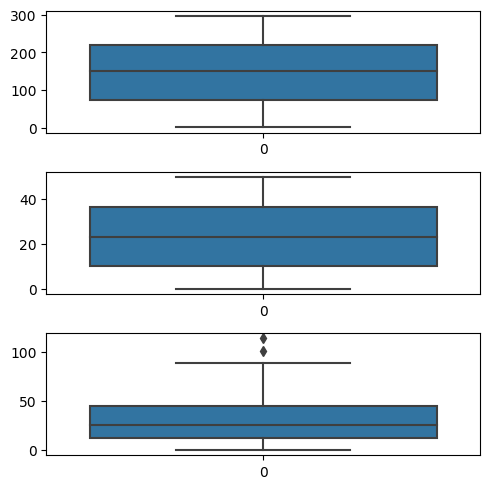

In [7]:
fig , axs = plt.subplots(3 ,figsize = (5,5)) 
plt1 = sns.boxplot(data['TV'],ax=axs[0])
plt2 = sns.boxplot(data['Radio'],ax=axs[1])
plt3 = sns.boxplot(data['Newspaper'],ax=axs[2])
plt.tight_layout()

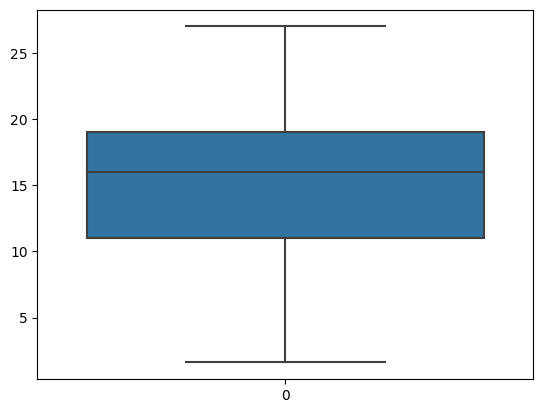

In [8]:
sns.boxplot(data['Sales'])
plt.show()

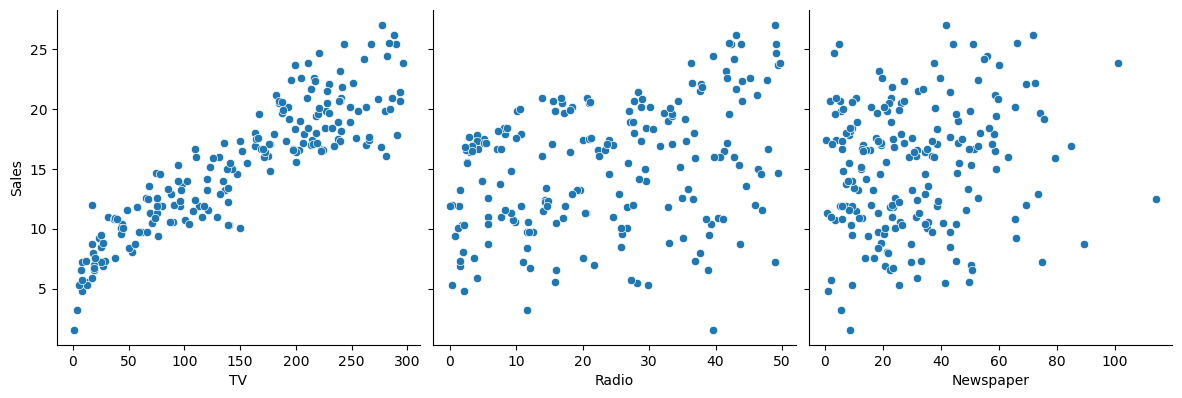

In [9]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',height=4)
plt.show()

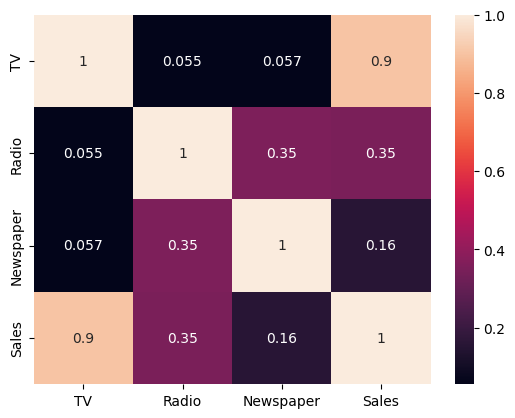

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

**3.Model Building**

In [11]:
x=data[['TV']]
y=data[['Sales']]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [14]:
log=LinearRegression()
log.fit(X_train,Y_train)

LinearRegression()

In [15]:
log.coef_

array([[0.05693813]])

In [16]:
log.intercept_

array([6.8082041])

In [17]:
pred=log.predict(X_test)
pred

array([[18.42927592],
       [14.73399145],
       [11.0956451 ],
       [20.57014952],
       [12.17177571],
       [16.4990734 ],
       [ 9.2622374 ],
       [10.98746266],
       [18.80506756],
       [ 8.33414592],
       [12.5247921 ],
       [17.10261755],
       [ 7.9241914 ],
       [15.72471487],
       [17.8371194 ],
       [19.47124365],
       [19.47124365],
       [ 8.97185294],
       [19.03282007],
       [11.08425747],
       [ 7.8786409 ],
       [14.56317706],
       [22.5743716 ],
       [ 9.34195077],
       [19.24349114],
       [13.96532673],
       [17.50687826],
       [18.58300887],
       [ 7.77045845],
       [22.3921696 ],
       [ 9.85439392],
       [13.66924846],
       [22.00499033],
       [18.05917809],
       [16.88625267],
       [11.83584076],
       [23.09250856],
       [13.23651869],
       [13.0600105 ],
       [15.43433042],
       [14.75107289],
       [20.32531557],
       [21.25910086],
       [ 7.78753989],
       [22.56298398],
       [20

In [18]:
Y_test-pred

,Sales
14,0.570724
116,-2.533991
82,0.204355
111,1.229850
196,1.828224
177,0.200927
38,0.837763
140,-0.087463
59,-0.405068
72,0.465854


In [19]:
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,pred))
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print("Score:",metrics.r2_score(Y_test,pred))

Mean Squared Error: 4.429492476038703
Mean Absolute Error: 1.6644385133684898
Root Mean Squared Error: 2.1046359485760724
Score: 0.7899661709092338


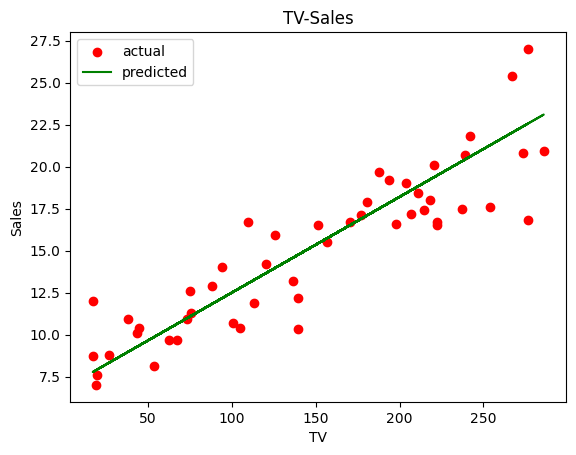

In [20]:
plt.title("TV-Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.scatter(X_test,Y_test,label='actual',color='r')
plt.plot(X_test,pred,label='predicted',color='g')
plt.legend()